![jupyter](./tasks/task3.png)
![jupyter](./tasks/task3-var-1.png)
![jupyter](./tasks/task3-var-2.png)

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable
from scipy.stats import chi2

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)
    
n = 120

$Плотность \spaceи\space функция\space распределения \spaceхи-квадрат\space$

![jupyter](./pictures/p_chi2.png)
![jupyter](./pictures/F_chi2.png)

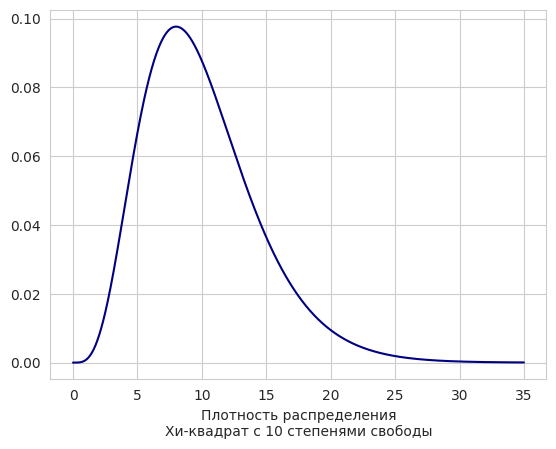

In [2]:
x = np.arange(0, 35, 0.001)
p_chi2 = chi2.pdf(x, df=10)
F = chi2.cdf(x, df=10)

sb.set_style("whitegrid")
plt.plot(x, p_chi2, color='navy')
plt.xlabel('Плотность распределения\nХи-квадрат с 10 степенями свободы')
plt.show()

In [3]:
Y = np.array([])
for i in range(n):
    Y = np.append(Y, random.random())

X = np.array([])
for i in range(n):
    X = np.append(X, chi2.ppf(Y[i], df=10))
print("Смоделированный массив X =")
print(X)

Смоделированный массив X =
[14.906 10.588  4.625 15.787 21.602  8.273  7.145  7.911 13.687 12.942
  4.683 14.498 14.768  4.996  8.074  2.496  4.684 16.526 12.005 14.479
 11.035 11.635 16.142  8.476  7.482 18.447 10.56  24.187 17.944 12.205
 13.994 15.215  6.878  7.355  9.605  6.793  6.91   7.178 10.142  1.853
 12.706 18.704 10.125 24.315  7.982 13.013  3.901 13.79   7.203  9.724
 10.973  7.488 12.658 10.007  8.459  7.507  4.382  8.292  9.541 17.13
 12.413 13.378 14.476 12.456 10.317 15.634 10.676  9.701  8.87  17.567
 10.56   8.916  8.079  8.054  4.704 22.413  6.583  7.696  6.542  3.722
 10.519 16.43   7.471  7.626 12.391  4.114 10.521  9.914 18.123 12.206
  6.399  6.891  5.663 11.612  2.975 11.864  6.653 12.674  5.061  7.584
  9.913 10.567  3.769  4.594  5.215 17.265  6.594  9.655  8.502 11.706
 11.774 17.045  6.181  9.813  7.976  7.209  9.979 18.624  7.268 10.024]


In [4]:
Max = np.amax(X)
Min = np.amin(X)
w = Max - Min

print("Находим крайние члены вариационного ряда и размах выборки\n")
print("Размер n = %d\nКрайние члены вариационного ряда max = %.3f, min = %.5f\nРазмах выборки w = %f" 
      %(n, Max, Min, w))

Находим крайние члены вариационного ряда и размах выборки

Размер n = 120
Крайние члены вариационного ряда max = 24.315, min = 1.85337
Размах выборки w = 22.461898


In [5]:
l = math.trunc(1 + math.log2(n))
h = w / l

print("Осуществляем группировку данных\n")

print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))

hist, bin_edges = np.histogram(X, l)
bin_edges_average = np.zeros(bin_edges[:7].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2 
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[6])
print_table(th, td)

p = hist / n

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Осуществляем группировку данных

Число интервалов l = 7
Шаг(ширина интервалов группировки) h = 3.208843


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|            3.457789705721296            |                        15.0                        |
|            6.666632223977778            |                        31.0                        |
|             9.87547474223426            |                        30.0                        |
|            13.084317260490744           |                        23.0                        |
|            16.293159778747228           |                        12.0                        |
|            19.502002297003713           |                        5.0                         |
|            22.71084

По сгруппированным данным строим гистограмму относительных частот



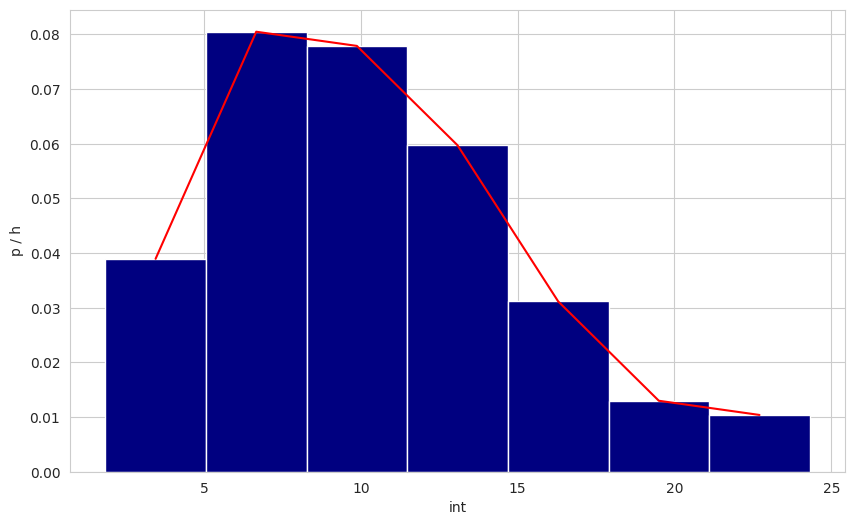

In [6]:
print("По сгруппированным данным строим гистограмму относительных частот\n")

sb.set_style("whitegrid")
plt.figure(figsize=(10,6))
xx = Int
yy = p / h
plt.bar(xx, yy, width=h, color='navy')
plt.plot(xx, yy, color='red')
plt.xlabel("int")
plt.ylabel("p / h")
plt.show()

In [7]:
print("Вычисляем выборочное среднее и выборочную дисперсию\n")

xm = sum(X) / n
s2 = sum((X[i] - xm) ** 2 for i in range(n)) / (n - 1)
print("Выброчное среднее xm =", round(xm, 5))
print("Выборочная дисперсия s2 =", round(s2, 5))

Вычисляем выборочное среднее и выборочную дисперсию

Выброчное среднее xm = 10.41443
Выборочная дисперсия s2 = 21.26386


Строим совмещенные графики гистограммы и плотности предполагаемого закона



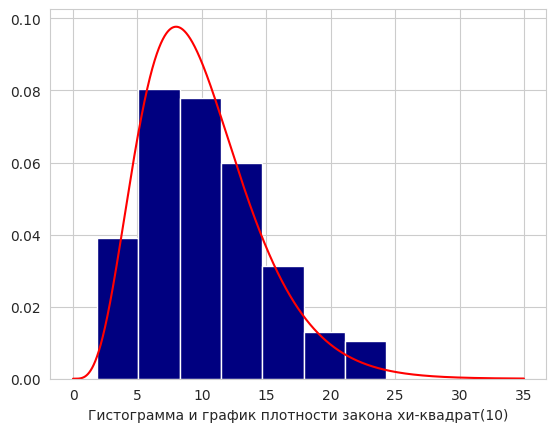

In [8]:
print("Строим совмещенные графики гистограммы и плотности предполагаемого закона\n")

sb.set_style("whitegrid")
plt.plot(x, p_chi2, color='red')
plt.xlabel('Гистограмма и график плотности закона хи-квадрат(10)')
xx = Int
yy = p / h
plt.bar(xx, yy, width=h, color='navy')
plt.show()

![jupyter](./pictures/E-chi2.png)
![jupyter](./pictures/Var-chi2.png)

In [9]:
th = ["Мат. ожидание (M)", "Эмпирическое среднее (xm)", "Сравнение(M - xm = 0)мало"]
td = np.array([10, round(xm, 5), 10 - xm])
print_table(th, td)

th = ["Дисперсия (D)", "Выборочная дисперсия (s2)", "Сравнение(D / s2 = 1.388)дисперсии близки"]
td = np.array([20, round(s2, 5), 20 / s2])
print_table(th, td)

+-------------------+---------------------------+---------------------------+
| Мат. ожидание (M) | Эмпирическое среднее (xm) | Сравнение(M - xm = 0)мало |
+-------------------+---------------------------+---------------------------+
|        10.0       |          10.41443         |    -0.41443234541943497   |
+-------------------+---------------------------+---------------------------+
+---------------+---------------------------+-------------------------------------------+
| Дисперсия (D) | Выборочная дисперсия (s2) | Сравнение(D / s2 = 1.388)дисперсии близки |
+---------------+---------------------------+-------------------------------------------+
|      20.0     |          21.26386         |             0.9405628272590905            |
+---------------+---------------------------+-------------------------------------------+


In [22]:
def funToArray(array, fun):
    arr = []
    for x in array:
        arr.append(fun(x))
    return arr

def ind(x):
    if (x > 0).any():
        return 1
    return 0

def Femp(z):
    result = 0
    for i in X:
        result += ind(z - i)
    result /= n
    return result
    
hama = 0.1
eps = math.sqrt(-1/(2 * n) * math.log(hama / 2))

def R(z):
    value = Femp(z) + eps 
    if value > 1:
        return 1
    else:
        return value

def L(z):
    value = Femp(z) - eps
    return Femp(z) - eps
    if value > 0:
        return value
    else:
        return 0

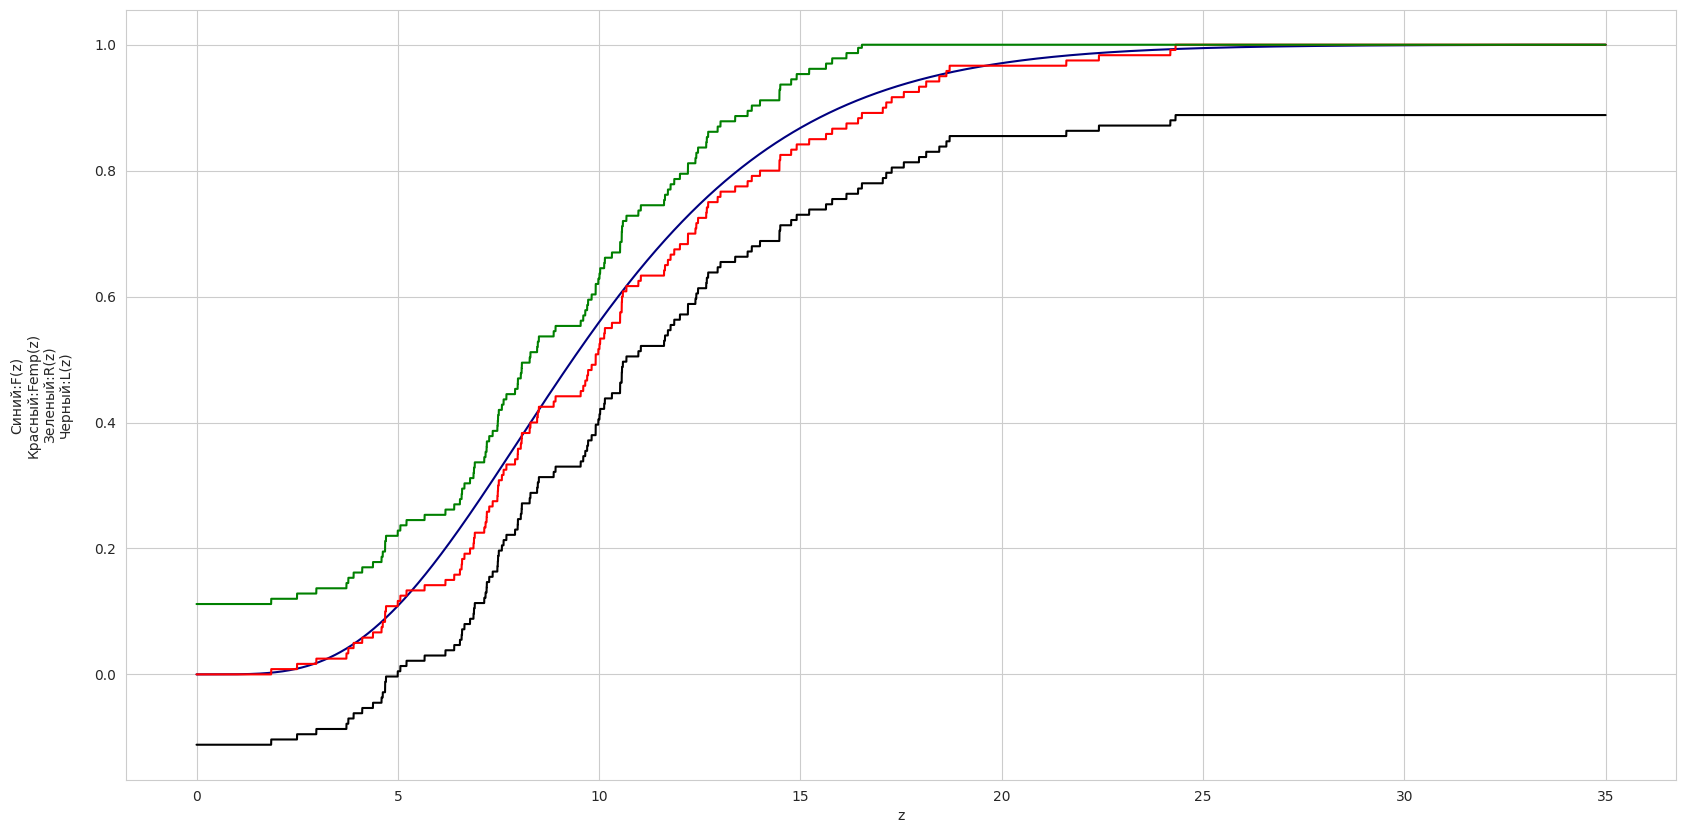

In [24]:
sb.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(x, F, color='navy')
plt.plot(x, funToArray(x, Femp), color='red')
plt.plot(x, funToArray(x, R), color='green')
plt.plot(x, funToArray(x, L), color='black')
plt.xlabel("z")
plt.ylabel("Синий:F(z)\nКрасный:Femp(z)\nЗеленый:R(z)\nЧерный:L(z)\n")
plt.show()

In [ ]:
def ind(x):
    if (x > 0):
        return 1
    return 0

def Femp(x):
    res = []
    for x_i in x:
        res.append(sum(p[i] * ind(x_i - Int[i]) for i in range(l)))
    return res

hama = 0.1
eps = math.sqrt(-1/(2 * n) * math.log(hama / 2))

def R(x):
    res = []
    for fx in Femp(x):
        if fx + eps < 1:
            res.append(fx + eps)
        else: 
            res.append(1)
    return res

def L(x):
    res = []
    for fx in Femp(x):
        if fx - eps > 0:
            res.append(fx - eps)
        else: 
            res.append(0)
    return res